**Problem Statement:**<br>
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. <br>

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 


In [285]:
## Importing required liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [286]:
## Reading the dataset
data=pd.read_csv('loan_prediction.csv')
## Saving a copy of the original dataset
data_copy=data

data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [287]:
data.shape

(614, 13)

In [288]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [289]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<font color='green'>
    
- **We have 12 features and 614 observations.** 


- **Following 7 features have object type data:**
 - Loan_ID
 - Gender
 - Married
 - Dependents 
 - Education
 - Self_Employed
 - Property_Area
 
 
- **Following 5 features have numeric data:**
 - ApplicantIncome
 - CoapplicantIncome
 - LoanAmount
 - Loan_Amount_Term 
 - Credit_History
 
 
- **'Loan_Status' is our target and stores object type data**


- **Following features have null values:**
 - Gender       :       13
 - Married        :       3
 - Dependents     :      15
 - Self_Employed   :     32
 - LoanAmount       :    22
 - Loan_Amount_Term  :   14
 - Credit_History     :  50
    

- **Will drop the 'Loan_ID' as it just stores unique IDs of loan applications**

In [290]:
## dropping the 'Loan_ID'
data.drop('Loan_ID',axis=1,inplace=True)

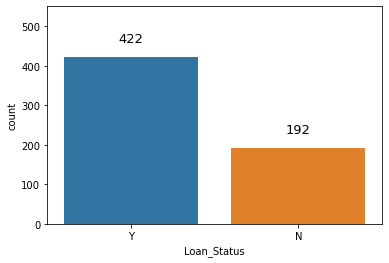

In [291]:
## Checking the classes and their frequencies in target variable

plt.ylim(0,550)
ax=sns.countplot(data['Loan_Status'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='black', size=13)
plt.show()

<font color = 'green'>
    
- 'Y' class has 422 observations and 'N' class has 192 observations.
- Will not consider this datset as imbalanced.

### Missing value imputation

- **'Gender'**

In [292]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [293]:
## Replacing missing values in 'Gender' by its most frequenty occuring class 'Male'
data['Gender'].replace(np.nan,'Male',inplace=True)

In [294]:
data['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

- **'Married'**

In [295]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [296]:
## Replacing missing values in 'Married' by its most frequenty occuring class 'Yes'
data['Married'].replace(np.nan,'Yes',inplace=True)

In [297]:
data['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

- **'Dependents'**

In [298]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [299]:
## Replacing missing values in 'Dependents' by its most frequenty occuring class '0'
data['Dependents'].replace(np.nan,'0',inplace=True)

In [300]:
data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

- **'Self_Employed'**

In [301]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [302]:
## Replacing missing values in 'Self_Employed' by its most frequenty occuring class 'No'
data['Self_Employed'].replace(np.nan,'No',inplace=True)

In [303]:
data['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

- **'LoanAmount'**

In [304]:
## Replacing missing values in 'LoanAmount' by its mean()
data['LoanAmount'].replace(np.nan,data['LoanAmount'].mean(),inplace=True)

In [305]:
data['LoanAmount'].isnull().sum()

0

- **'Loan_Amount_Term'**

In [306]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [307]:
## Replacing missing values in 'Loan_Amount_Term' by its most frequenty occuring class '360.0'
data['Loan_Amount_Term'].replace(np.nan,360.0,inplace=True)

In [308]:
data['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

- **'Credit_History'**

In [309]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [310]:
## Replacing missing values in 'Credit_History' by its most frequenty occuring class '1.0'
data['Credit_History'].replace(np.nan,1.0,inplace=True)

In [311]:
data['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [312]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<font color = 'green'>

-  **We have successfully imputed all the missing values**

### Storing Continuous and Catagorical features seperately for further analysis

In [313]:
cont_feat=data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]
cat_feat=data[['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area']]

## EDA

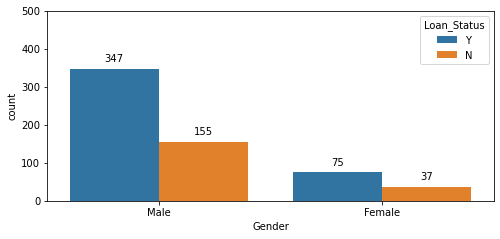

In [314]:
plt.figure(figsize=(8,3.5))
plt.ylim(0,500)

ax=sns.countplot(data['Gender'],hue=data['Loan_Status'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+70), ha='center', va='top', color='black', size=10)
plt.show()

- Majority of loan applicants are Males

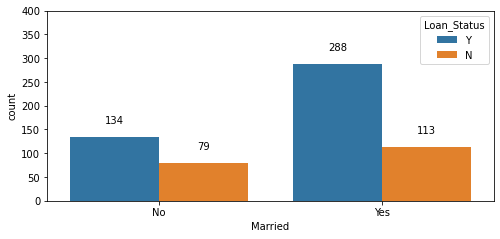

In [315]:
plt.figure(figsize=(8,3.5))
plt.ylim(0,400)

ax=sns.countplot(data['Married'],hue=data['Loan_Status'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+70), ha='center', va='top', color='black', size=10)
plt.show()

- Married people tend to apply for the loans more than the unmarried ones.
- Also the Proportion of approved loan applications is more in married applicants than the unmarried.

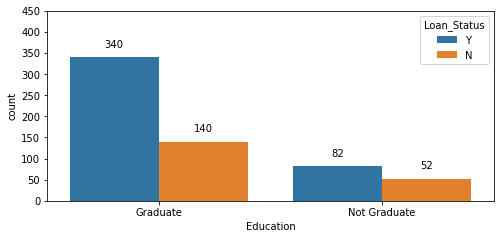

In [316]:
plt.figure(figsize=(8,3.5))
plt.ylim(0,450)

ax=sns.countplot(data['Education'],hue=data['Loan_Status'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+70), ha='center', va='top', color='black', size=10)
plt.show()

- People with higher education are more likely to get the loan approved than people with lower education. 

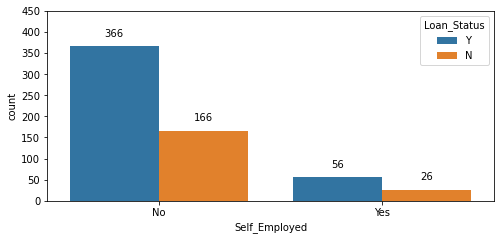

In [317]:
plt.figure(figsize=(8,3.5))
plt.ylim(0,450)

ax=sns.countplot(data['Self_Employed'],hue=data['Loan_Status'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+70), ha='center', va='top', color='black', size=10)
plt.show()

- Most of the loan applicants are with jobs. 
- Self-employed people are less likely to apply for loans than people with jobs.

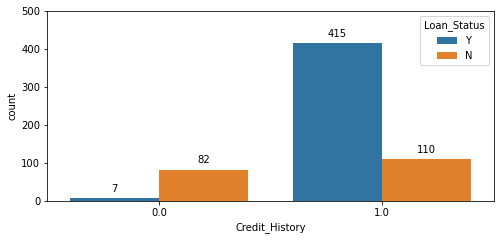

In [318]:
plt.figure(figsize=(8,3.5))
plt.ylim(0,500)

ax=sns.countplot(data['Credit_History'],hue=data['Loan_Status'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+70), ha='center', va='top', color='black', size=10)
plt.show()

- Good credit history drastically increases the chances of loan getting approved.
- Applicants with bad credit history have very low chances of getting the loan approved.

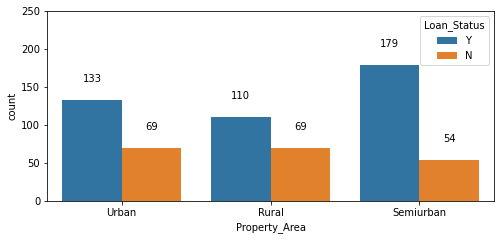

In [319]:
plt.figure(figsize=(8,3.5))
plt.ylim(0,250)

ax=sns.countplot(data['Property_Area'],hue=data['Loan_Status'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+50), ha='center', va='top', color='black', size=10)
plt.show()

- Proportion of successfull loan applications is more in Urban and Semiurban areas than the Rural area

### Encoding the catagorical data

In [320]:
data['Married'].replace(('Yes','No'),(1,0),inplace=True)

In [321]:
data['Self_Employed'].replace(('Yes','No'),(1,0),inplace=True)

In [322]:
data['Gender'].replace(('Male','Female'),(1,0),inplace=True)

In [323]:
data['Dependents'].replace(('0','1','2','3+'),(0,1,2,3),inplace=True)

In [324]:
data['Education'].replace(('Graduate','Not Graduate'),(1,0),inplace=True)

In [325]:
data['Property_Area'].replace(('Rural','Semiurban','Urban'),(1,2,3),inplace=True)

In [326]:
data['Loan_Status'].replace(('Y','N'),(1,0),inplace=True)

In [327]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


<font color = 'green'>

-  **Now, all of our data is in numeric form**

In [328]:
cont_feat=data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]
cat_feat=data[['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area']]

## Skewness and Outliers

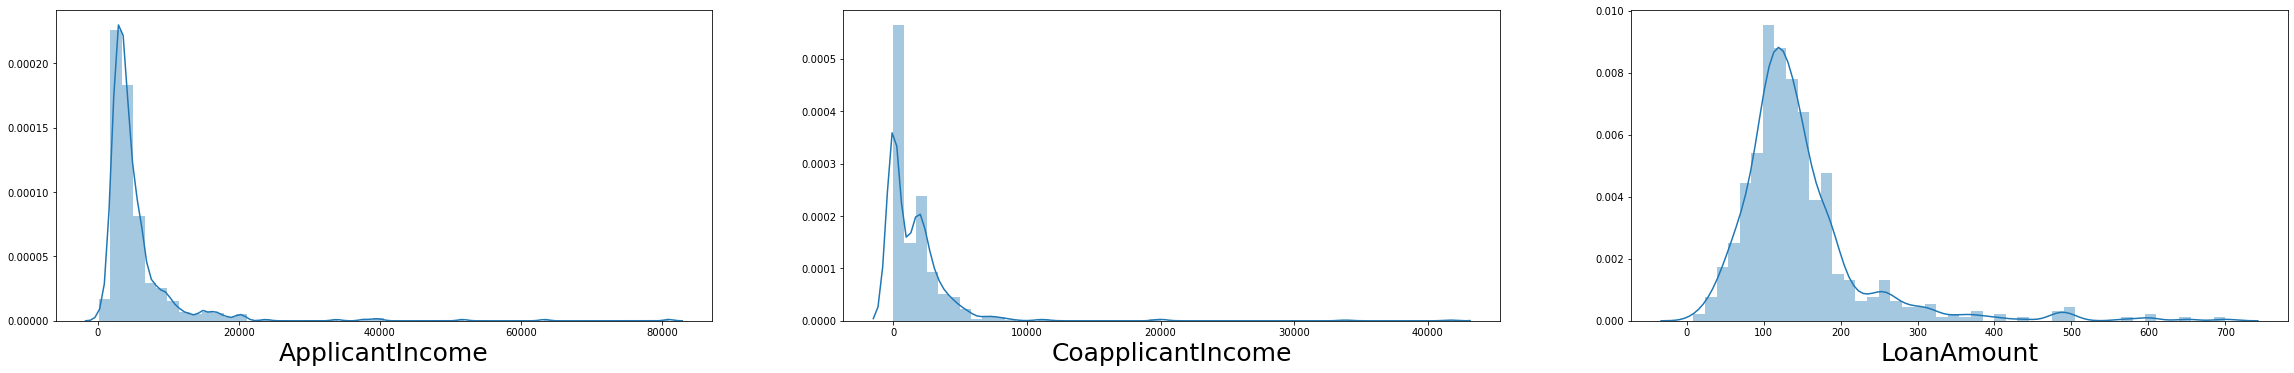

In [329]:
plt.figure(figsize=(40,40))
plot_number=1

for i in cont_feat:
    if plot_number<18:
        ax=plt.subplot(6,3,plot_number)
        sns.distplot(cont_feat[i])
        plt.xlabel(i,fontsize=25)
    plot_number+=1

In [330]:
cont_feat.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
dtype: float64

- All three continuous featrues show very high skewness

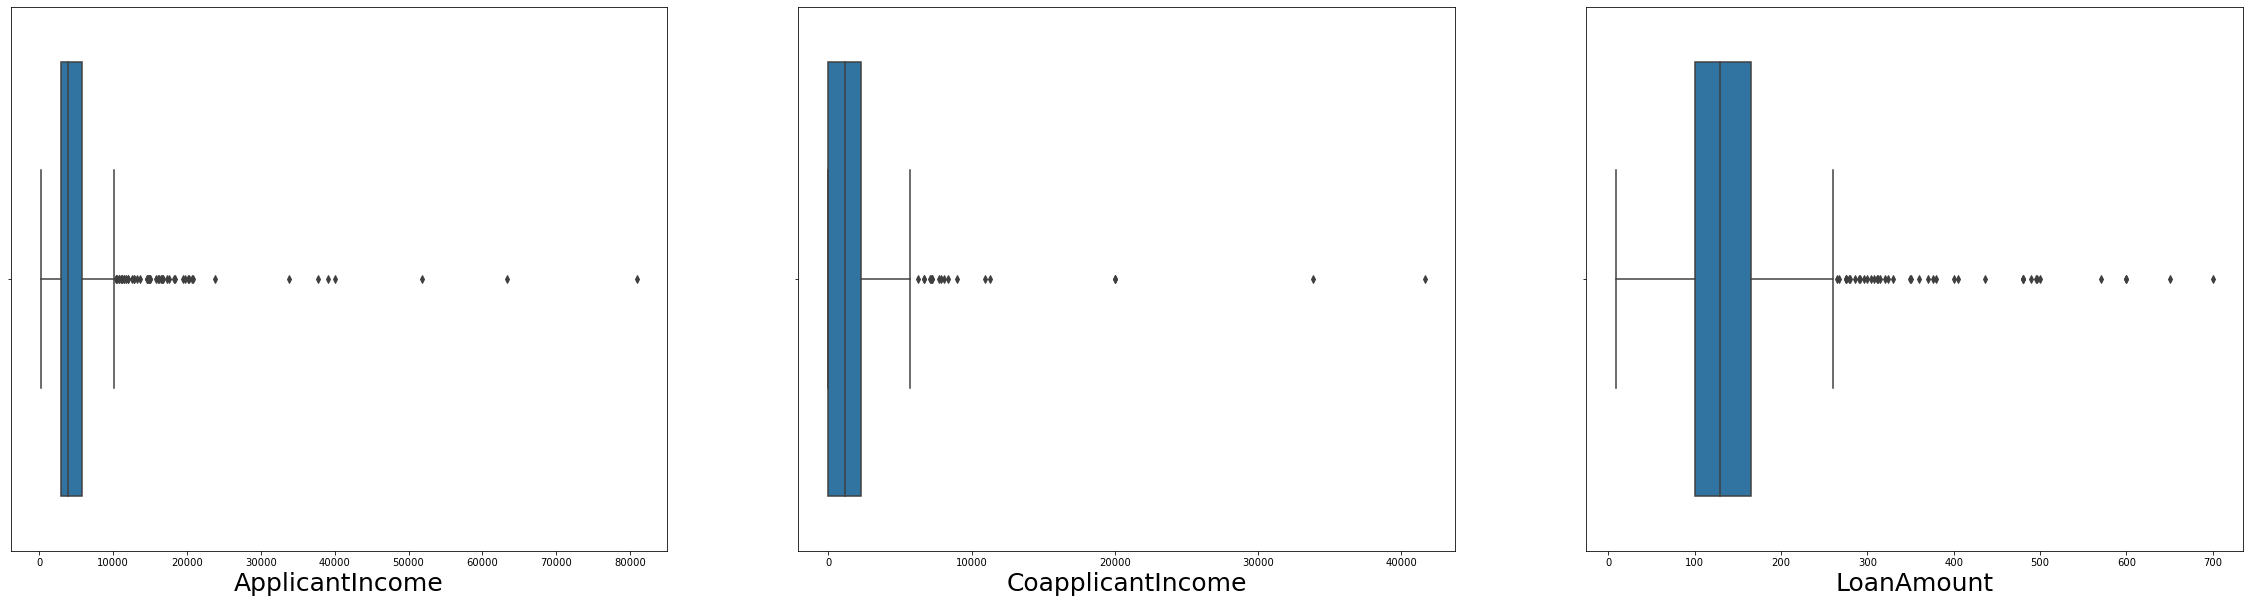

In [331]:
plt.figure(figsize=(40,10))
plot_number=1

for i in cont_feat:
    if plot_number<18:
        ax=plt.subplot(1,3,plot_number)
        sns.boxplot(cont_feat[i])
        plt.xlabel(i,fontsize=25)
    plot_number+=1

- **All three continuous features have outliers.**

In [332]:
# rejecting data beyond 3 std to manage skewness and outliers
from scipy.stats import zscore

z_score=zscore(data[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)
data=data[filtering_entry]

data.shape

(589, 12)

In [333]:
data_loss=((614-589)/614)*100
data_loss

4.071661237785016

- **We are losing about 5% data, which is fare enough.**

In [334]:
cont_feat=data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]
cat_feat=data[['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area']]

In [335]:
cont_feat.skew()

ApplicantIncome      2.164762
CoapplicantIncome    1.353191
LoanAmount           1.076221
dtype: float64

In [346]:
np.log1p(data['ApplicantIncome']).skew()

-0.20461978844304907

In [343]:
## Applying square root transformation to 'CoapplicantIncome' & 'LoanAmount'
for i in data[['CoapplicantIncome','LoanAmount']]:
    if data.skew().loc[i]>0.5:
        data[i]=np.sqrt(data[i])
data[['CoapplicantIncome','LoanAmount']].skew()

CoapplicantIncome    0.217598
LoanAmount           0.230632
dtype: float64

In [347]:
## Applying log tranformation to 'ApplicantIncome'
data['ApplicantIncome']=np.log1p(data['ApplicantIncome'])
data['ApplicantIncome'].skew()

-0.20461978844304907

<font color = 'green'>

-  **We have successfully reduced the skewness in all three continuous features**

In [348]:
cont_feat=data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]
cat_feat=data[['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area']]

## Feature Selection
**Checking the relationship between features and target**

In [364]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [371]:
selectbest=SelectKBest(score_func=f_classif,k=12)
selectbest.fit(data,data['Loan_Status'])

SelectKBest(k=12)

In [372]:
scores_df=pd.DataFrame(selectbest.scores_)
column_df=pd.DataFrame(data.columns)

In [373]:
feature_scores=pd.concat([column_df,scores_df],axis=1) # Concating two DFs
feature_scores.columns=['Features','Scores'] # Naming the columns
feature_scores.nlargest(12,'Scores')

,Features,Scores
11,Loan_Status,inf
9,Credit_History,262.535101
1,Married,5.359961
3,Education,5.104883
6,CoapplicantIncome,2.424969
7,LoanAmount,0.966422
10,Property_Area,0.715618
8,Loan_Amount_Term,0.313910
0,Gender,0.282758
2,Dependents,0.282620


<font color = 'green'>

-  **We will drop 'Self_Employed', 'ApplicantIncome' as they have very less scores**

In [376]:
data.drop(['Self_Employed', 'ApplicantIncome'],axis=1,inplace=True)

**Seperating the features and the target**

In [377]:
X=data.drop('Loan_Status',axis=1)
y=data['Loan_Status']

**Scaling the features**

In [378]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [379]:
X_scaled=scaler.fit_transform(X)

**Splitting the data into training and testing sets**

In [380]:
from sklearn.model_selection import train_test_split

In [381]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=42)

**Importing classification performance metrics**

In [385]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_roc_curve,roc_curve
from sklearn.model_selection import cross_val_score

## Model 1: Logistic Regression

In [382]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [383]:
lr.fit(X_train,y_train)

LogisticRegression()

In [384]:
y_lr=lr.predict(X_test)

In [386]:
lr_score=accuracy_score(y_test,y_lr)
lr_score

0.7837837837837838

In [387]:
lr_cvs=cross_val_score(lr,X_scaled,y,cv=5).mean()
lr_cvs

0.8149500217296828

In [388]:
print(confusion_matrix(y_test,y_lr))

[[17 31]
 [ 1 99]]


In [389]:
print(classification_report(y_test,y_lr))

              precision    recall  f1-score   support

           0       0.94      0.35      0.52        48
           1       0.76      0.99      0.86       100

    accuracy                           0.78       148
   macro avg       0.85      0.67      0.69       148
weighted avg       0.82      0.78      0.75       148



## Model 2: SVC

In [390]:
from sklearn.svm import SVC
svc=SVC()

In [391]:
svc.fit(X_train,y_train)

SVC()

In [392]:
y_svc=svc.predict(X_test)

In [393]:
svc_score=accuracy_score(y_test,y_svc)
svc_score

0.7837837837837838

In [394]:
svc_cvs=cross_val_score(svc,X_scaled,y,cv=5).mean()
svc_cvs

0.8183543386933219

In [395]:
print(confusion_matrix(y_test,y_svc))

[[17 31]
 [ 1 99]]


In [396]:
print(classification_report(y_test,y_svc))

              precision    recall  f1-score   support

           0       0.94      0.35      0.52        48
           1       0.76      0.99      0.86       100

    accuracy                           0.78       148
   macro avg       0.85      0.67      0.69       148
weighted avg       0.82      0.78      0.75       148



## Model 3: Random forest Classificafier

In [419]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [420]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [421]:
y_rf=rf.predict(X_test)

In [422]:
rf_score=accuracy_score(y_test,y_rf)
rf_score

0.7635135135135135

In [423]:
rf_cvs=cross_val_score(rf,X_scaled,y,cv=5).mean()
rf_cvs

0.7979574098218166

In [425]:
print(confusion_matrix(y_test,y_rf))

[[20 28]
 [ 7 93]]


In [426]:
print(classification_report(y_test,y_rf))

              precision    recall  f1-score   support

           0       0.74      0.42      0.53        48
           1       0.77      0.93      0.84       100

    accuracy                           0.76       148
   macro avg       0.75      0.67      0.69       148
weighted avg       0.76      0.76      0.74       148



## Model 4: KNN Classifier

In [403]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [404]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [405]:
y_knn=knn.predict(X_test)

In [406]:
knn_score=accuracy_score(y_test,y_knn)
knn_score

0.777027027027027

In [407]:
knn_cvs=cross_val_score(knn,X_scaled,y,cv=5).mean()
knn_cvs

0.792843691148776

In [408]:
print(confusion_matrix(y_test,y_knn))

[[18 30]
 [ 3 97]]


In [410]:
print(classification_report(y_test,y_knn))

              precision    recall  f1-score   support

           0       0.86      0.38      0.52        48
           1       0.76      0.97      0.85       100

    accuracy                           0.78       148
   macro avg       0.81      0.67      0.69       148
weighted avg       0.79      0.78      0.75       148



## Model 5: GradientBoosting classifier

In [411]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

In [412]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [413]:
y_gbc=gbc.predict(X_test)

In [414]:
gbc_score=accuracy_score(y_test,y_gbc)
gbc_score

0.7364864864864865

In [415]:
gbc_cvs=cross_val_score(gbc,X_scaled,y,cv=5).mean()
gbc_cvs

0.7979574098218165

### Plotting the roc_auc curve

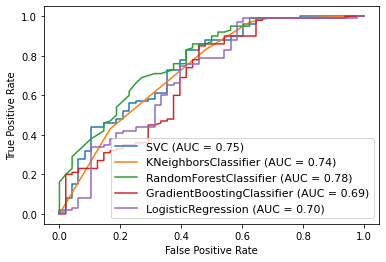

In [416]:
disp=plot_roc_curve(svc,X_test,y_test)

plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gbc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')

**Based on the AUC, Random Forest Classifier is our best model**

## Tuning the hyperparameters of best model

In [427]:
from sklearn.model_selection import GridSearchCV

In [428]:
rf_grid={'criterion':['gini','entropy'],
         'min_samples_split':[2,3,4,5,6],
         'min_samples_leaf':[1,2,3,4,5],
         'n_estimators':[80,100,120,150]}

In [429]:
gridCV=GridSearchCV(rf,param_grid=rf_grid,n_jobs=-1)

In [430]:
gridCV.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [80, 100, 120, 150]})

In [431]:
gridCV.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'n_estimators': 100}

In [432]:
rf_best=RandomForestClassifier(criterion='gini',min_samples_split=4,min_samples_leaf=5,n_estimators=100)

In [433]:
rf_best.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=5, min_samples_split=4)

In [434]:
y_best=rf_best.predict(X_test)

In [435]:
best_score=accuracy_score(y_test,y_best)
best_score

0.7837837837837838

In [437]:
best_cvs=cross_val_score(rf_best,X_scaled,y,cv=5).mean()
best_cvs

0.8149645081848472

In [438]:
print(confusion_matrix(y_test,y_best))

[[17 31]
 [ 1 99]]


In [439]:
print(classification_report(y_test,y_best))

              precision    recall  f1-score   support

           0       0.94      0.35      0.52        48
           1       0.76      0.99      0.86       100

    accuracy                           0.78       148
   macro avg       0.85      0.67      0.69       148
weighted avg       0.82      0.78      0.75       148



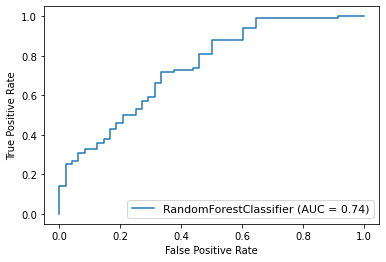

In [441]:
## Plotting roc_auc curve for the best model
disp=plot_roc_curve(rf_best,X_test,y_test)
plt.legend(prop={'size':11},loc='lower right')

### Saving the best model

In [ ]:
import pickle
filename='LoanApplicationStatus_rfc.pkl'
pickle.dump(rf_best,open(filename,'wb'))